## Task 01

1. Considera un modelo de regresión lineal con dos características, X₁ y X₂, y sus pesos correspondientes w₁ y
w₂. Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1, ¿cuál es la interpretación
del coeficiente 3w₂ en el contexto del modelo?

Representa el coeficiente de regresión sin estandarizar, el cual se calcula siguiendo el método de los mínimos cuadrados ordinarios y hay uno de dichos coeficientes para cada variable independiente.
Es el cambio estimado en unidades de "y" que se deriva del incremento de X₂ (variable independiente) cuando X₁ se mantiene constante.

https://physiostats.com/regresion-lineal-interpretacion-coeficientes/

2. Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la
multicolinealidad a la interpretación de los coeficientes de regresión individuales?

La multicolinealidad en la regresión lineal ocurre cuando las variables que se usan para predecir están muy conectadas. Esto causa resultados extraños en las interpretaciones y reduce la precisión de los coeficientes. También dificulta la identificación de variables importantes y puede conducir a problemas numéricos. (Sevilla, A. 2019)

https://economipedia.com/definiciones/multicolinealidad.html

## Task 02

In [107]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# Cargar el conjunto de datos desde el archivo CSV
file_path = 'dataset_phishing.csv'
df = pd.read_csv(file_path)

X = df[['ip', 'length_url', 'nb_www', 'ratio_digits_url', 'phish_hints',
  'nb_hyperlinks', 'domain_in_title', 'google_index',
  'page_rank']]
y = df.iloc[:, -1]

X.head()

,ip,length_url,nb_www,ratio_digits_url,phish_hints,nb_hyperlinks,domain_in_title,google_index,page_rank
0,0,37,1,0.000000,0,17,0,1,4
1,1,77,0,0.220779,0,30,1,1,2
2,1,126,0,0.150794,0,4,1,1,0
3,0,18,0,0.000000,0,149,1,0,3
4,0,55,1,0.000000,0,102,0,0,6


In [110]:
dummies = pd.get_dummies(y)
concatenado = pd.concat([y, dummies], axis=1)
concatenado = concatenado.drop(['status', "legitimate"], axis=1)
y = concatenado


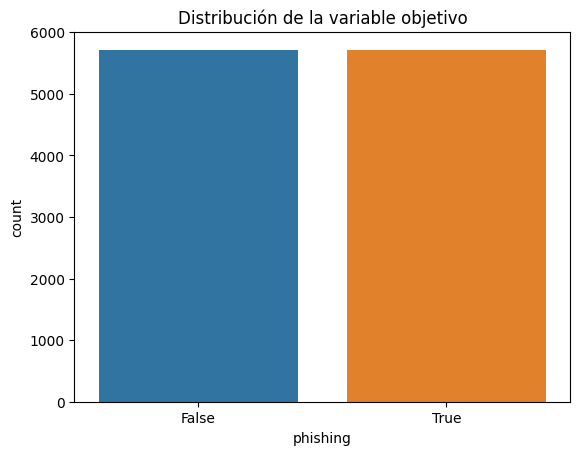

In [111]:
# Revisar si el dataset está balanceado
sns.countplot(x='phishing', data=y)
plt.title('Distribución de la variable objetivo')
plt.show()

In [112]:
X = X.values
y = y.values
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


- Cambiamos el formato de los datos en y

In [113]:
y
y = y[:, -1]
y

array([False,  True,  True, ..., False, False,  True])

In [114]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.3, random_state = 1)
#X_entreno, X_temp, y_entreno, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [103]:
#X_prueba, X_check, y_prueba, y_check = train_test_split(X_temp, y_temp, test_size = 0.33, random_state = 1)

In [115]:
print(X_entreno)
print(X_prueba)
#print(X_check)
print(y_entreno)
print(y_prueba)
#print(y_check)

[[ 0. 29.  0. ...  1.  1.  5.]
 [ 0. 18.  0. ...  1.  0.  0.]
 [ 0. 40.  1. ...  1.  1.  5.]
 ...
 [ 1. 40.  0. ...  1.  1.  5.]
 [ 0. 43.  1. ...  0.  0. 10.]
 [ 0. 60.  1. ...  1.  0.  4.]]
[[  0.  51.   1. ...   1.   0.   6.]
 [  1. 164.   1. ...   1.   1.   1.]
 [  1. 238.   0. ...   1.   0.   5.]
 ...
 [  0.  35.   0. ...   1.   0.   5.]
 [  0.  20.   0. ...   0.   0.   2.]
 [  1.  77.   0. ...   1.   1.   2.]]
[ True  True False ...  True False False]
[False  True  True ... False False  True]


#### Normalizando los datos

In [116]:
from sklearn.preprocessing import StandardScaler
standar_x = StandardScaler()
X_entreno = standar_x.fit_transform(X_entreno)
X_prueba = standar_x.transform(X_prueba)
X_entreno
X_prueba

array([[-0.42025902, -0.18084394,  1.09379597, ...,  0.53471574,
        -1.07437475,  1.12188874],
       [ 2.3794849 ,  1.77059612,  1.09379597, ...,  0.53471574,
         0.93077392, -0.85090946],
       [ 2.3794849 ,  3.04853032, -0.90061186, ...,  0.53471574,
        -1.07437475,  0.7273291 ],
       ...,
       [-0.42025902, -0.45715404, -0.90061186, ...,  0.53471574,
        -1.07437475,  0.7273291 ],
       [-0.42025902, -0.71619475, -0.90061186, ..., -1.87015253,
        -1.07437475, -0.45634982],
       [ 2.3794849 ,  0.26815997, -0.90061186, ...,  0.53471574,
         0.93077392, -0.45634982]])

- Recuerde definir de forma clara y razonada (es decir, diga el por qué de su elección) de una métrica de
desempeño principal

### Regresion Logistica - implementacion

In [133]:
def gradiente_w(w, b):
    gradiente = [0, 0]
    gradiente[0] = 1/(1+np.exp(-(X_entreno[1]*w+b)))
    gradiente[1] = (gradiente[0]-y_entreno[0])*X_entreno[1]
    derivative = gradiente[1].mean()
    return(derivative) 

def gradiente_b(w, b):
    gradiente = [0, 0]
    gradiente[0] = 1/(1+np.exp(-(X_entreno[1]*w+b)))
    gradiente[1] = (gradiente[0]-y_entreno[0])
    derivative = gradiente[1].mean()
    return(derivative) 


In [139]:
pasos_w = 0.01
pasos_b = 0.01

for i in range(1000):
    w = w - pasos_w*gradiente_w(w, b)
    b = b - pasos_b*gradiente_b(w, b)

print(w)
print(b)

-1.1832796197551263
2.844209603010604


### Regresión Logística - Librerias

In [ ]:
# Entrenamiento del modelo
from sklearn.linear_model import LogisticRegression
regresor = LogisticRegression(max_iter=1000)
regresor.fit(X_entreno, y_entreno)

NameError: name 'X_entreno' is not defined

In [ ]:
y_pred = regresor.predict(X_prueba)
print(y_pred)

NameError: name 'regresor' is not defined

In [ ]:
print(len(y_pred))

3429


In [ ]:
print(len(y_entreno))

8001


In [ ]:
print(len(X_entreno))

8001


In [ ]:
y_pred
y_prueba

array([False,  True,  True, ..., False, False,  True])

### Evaluacion

### Matriz de confucion

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_prueba, y_pred)
conf_mat

array([[1575,  136],
       [ 150, 1568]], dtype=int64)

In [ ]:
1575/len(y_pred)

0.45931758530183725

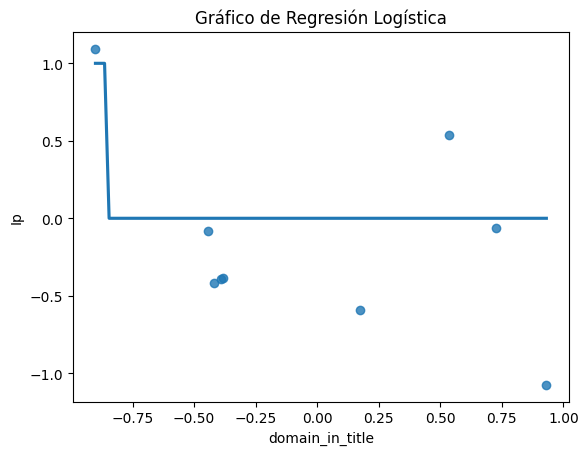

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'x' y 'y' son las variables que deseas graficar
# y que 'y_pred' contiene las predicciones

# Crear un DataFrame para las predicciones
#predic = pd.DataFrame({'y_pred':X_entreno[0], 'y_true': X_entreno[0]})

# Crear un gráfico de regresión logística
sns.regplot(x=X_entreno[0], y=X_entreno[6], data=y_pred, logistic=True, ci=None)

# Añadir etiquetas y título al gráfico
plt.xlabel('domain_in_title')
plt.ylabel('Ip')
plt.title('Gráfico de Regresión Logística')

# Mostrar el gráfico
plt.show()
